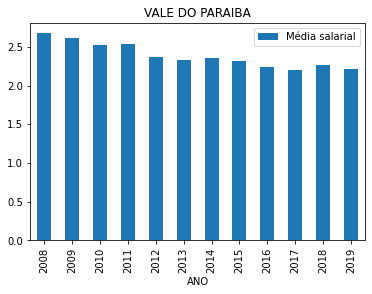

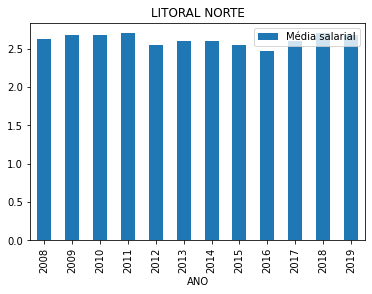

In [10]:
# 4.1
import pandas as pd
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvCadastroCentral = './dados/cadastro_central_de_empresas.csv'
dataCadastroCentral = pd.read_csv(csvCadastroCentral, sep= ',', encoding='utf-8')

def createQuery(list, region):
        count = 0
        query = ""
        keyValList = [region]
        expectedResult = [d for d in list if d['regiao'] in keyValList]
        
        for abr_code in list:
                if abr_code["regiao"] == region :
                        query += 'Localidade == "' + str(abr_code["nome"] + '" ')
                        count += 1
                        if count < len(expectedResult):
                                query += ' or '
        return query

anos = ['2008','2009', '2010','2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019']
listAllResults = []

def generateChart(regiao):
        query = createQuery(abrangencia, regiao)
        nCidades = [n for n in abrangencia if n['regiao'] in regiao]
        dfmCadastroCentralRegiao = pd.DataFrame(data = dataCadastroCentral.query(query))
        dfmCadastroCentral = pd.DataFrame(data = dfmCadastroCentralRegiao.query('Nome == "Salário médio mensal"'), columns=anos)

        total = dfmCadastroCentral.sum(axis=0)
        dfTotal = pd.DataFrame(total)

        listResults = []

        for ano in anos:
                mediaSararialAnos = dfTotal.loc[ano] / len(nCidades)
                dft = pd.DataFrame({"ANO": ano, "Média salarial": mediaSararialAnos})
                listResults.append(dft)

        dfm = pd.concat(listResults)
        listAllResults.append(dfm)
        dfm.plot(kind="bar", x="ANO", title=regiao)
        dfm.to_csv('export/media_salarial_regiao_'+ regiao.replace(" ", "_") +'.csv', encoding='utf-8')

generateChart('VALE DO PARAIBA')
generateChart('LITORAL NORTE')


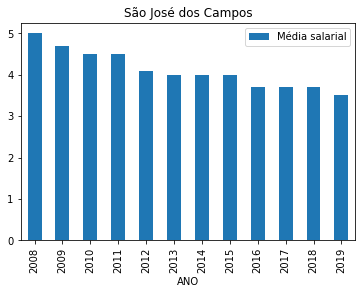

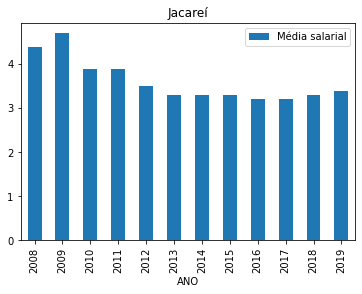

In [11]:

def generateChartCity(cidade):
    listResults = []
    dfmCadastroCentralCidade = pd.DataFrame(data = dataCadastroCentral.query('Nome == "Salário médio mensal" and Localidade == "'+ cidade +'"'), columns=anos)
    total = dfmCadastroCentralCidade.sum(axis=0)
    dfTotal = pd.DataFrame(total)
    for ano in anos:
        mediaSararialAnos = dfTotal.loc[ano]
        dft = pd.DataFrame({"ANO": ano, "Média salarial": mediaSararialAnos})
        listResults.append(dft)
    dfm = pd.concat(listResults)
    dfm.plot(kind="bar", x="ANO", title=cidade)
    dfm.to_csv('export/media_salarial_cidade_'+ cidade.replace(" ", "_") +'.csv', encoding='utf-8')


generateChartCity('São José dos Campos')
generateChartCity('Jacareí')